In [268]:
import pandas as pd
import numpy as np 

df1 = pd.read_csv('./tmdb_5000_credits.csv')
df2 = pd.read_csv('./tmdb_5000_movies.csv')

In [269]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [270]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [271]:
df2['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

HIGH RATING MOVIES

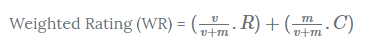

In [272]:
C = df2['vote_average'].mean()
C

6.092171559442016

In [273]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [274]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape # top 10% based on vote count

(481, 20)

In [275]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

In [276]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [277]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


TRENDING MOVIES

Text(0, 0.5, 'Popular Movies')

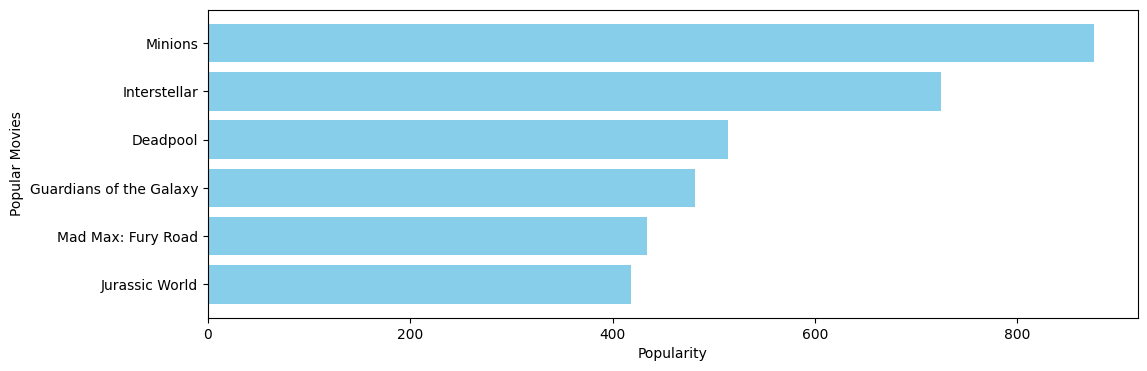

In [278]:
pop = df2.sort_values('popularity', ascending=False)

from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.ylabel('Popular Movies')


CONTENT BASED FILTERING

In [279]:
def get_list(x):
    names = [i['name'] for i in x]
    return names

In [280]:
q_movies['genres']

1881    [{"id": 18, "name": "Drama"}, {"id": 80, "name...
662                         [{"id": 18, "name": "Drama"}]
65      [{"id": 18, "name": "Drama"}, {"id": 28, "name...
3232    [{"id": 53, "name": "Thriller"}, {"id": 80, "n...
96      [{"id": 28, "name": "Action"}, {"id": 53, "nam...
                              ...                        
41      [{"id": 12, "name": "Adventure"}, {"id": 28, "...
337     [{"id": 28, "name": "Action"}, {"id": 53, "nam...
193     [{"id": 878, "name": "Science Fiction"}, {"id"...
91      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
242     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, Length: 481, dtype: object

In [281]:
from ast import literal_eval

q_movies['genres'] = q_movies['genres'].apply(literal_eval)

q_movies['genres'] = q_movies['genres'].apply(get_list)

In [282]:
q_movies['genres'].head(5)

1881                                       [Drama, Crime]
662                                               [Drama]
65                       [Drama, Action, Crime, Thriller]
3232                                    [Thriller, Crime]
96      [Action, Thriller, Science Fiction, Mystery, A...
Name: genres, dtype: object

In [283]:
list_genres = []

def all_genres(x):
    global list_genres
    for i in x:
        if i not in list_genres:
            list_genres.append(i)

In [284]:
q_movies['genres'].copy().apply(all_genres)
list_genres

['Drama',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Adventure',
 'Comedy',
 'Romance',
 'Fantasy',
 'History',
 'War',
 'Animation',
 'Family',
 'Western',
 'Horror',
 'Music']

In [293]:
popular_movies= pd.DataFrame(list_genres, columns=['Genre'])
popular_movies

,Genre
0,Drama
1,Crime
2,Action
3,Thriller
4,Science Fiction
5,Mystery
6,Adventure
7,Comedy
8,Romance
9,Fantasy


In [294]:
def count_genres(x, lst=list_genres):
    list_count = []
    for genre in lst:
        count = 0
        for i in x:
            for j in i:
                if genre == j:
                    count += 1
        list_count.append(count)
    return list_count

popular_movies['count'] = count_genres(q_movies['genres'])
popular_movies

,Genre,count
0,Drama,161
1,Crime,68
2,Action,225
3,Thriller,147
4,Science Fiction,135
5,Mystery,39
6,Adventure,203
7,Comedy,105
8,Romance,45
9,Fantasy,100


In [299]:
popular_movies.sort_values('count', ascending=False)

,Genre,count
2,Action,225
6,Adventure,203
0,Drama,161
3,Thriller,147
4,Science Fiction,135
7,Comedy,105
9,Fantasy,100
13,Family,75
1,Crime,68
12,Animation,54


In [ ]:
def 